<a href="https://colab.research.google.com/github/imelskamelia/Machine-Learning/blob/main/Submission_MachineLearning_Kamelia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Submission Dicoding-Belajar Machine Learning Pemula**
# **Nama: Kamelia**

In [1]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop

In [2]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-11-07 18:27:48--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  8.24MB/s    in 44s     

2020-11-07 18:28:33 (6.95 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [3]:
#ekstraksi pada file zip
import zipfile
local_zip = "/tmp/rockpaperscissors.zip"
zip_ref = zipfile.ZipFile(local_zip, "r")
zip_ref.extractall("/tmp")
zip_ref.close()

In [4]:
import os, shutil
base_dir = "/tmp/rockpaperscissors"
train_dir = os.path.join(base_dir,"train")
validation_dir = os.path.join(base_dir, "val")
rock_dir = os.path.join(base_dir,"rock")
paper_dir = os.path.join(base_dir, "paper")
scissors_dir = os.path.join(base_dir, "scissors")

In [5]:
#train dataset direction
os.mkdir(train_dir)

#validation dataset direction
os.mkdir(validation_dir)

In [6]:
from sklearn.model_selection import train_test_split
#train dataset
train_rock = os.path.join(train_dir, 'rock')
train_paper = os.path.join(train_dir, 'paper')
train_scissors = os.path.join(train_dir, 'scissors')

#validation dataset
val_rock = os.path.join(validation_dir, 'rock')
val_paper = os.path.join(validation_dir, 'paper')
val_scissors = os.path.join(validation_dir, 'scissors')

In [7]:
#create a directory train for rock, paper, scrissors
os.mkdir(train_rock)
os.mkdir(train_paper)
os.mkdir(train_scissors)

#create a directory validation for rock, paper, scrissors
os.mkdir(val_rock)
os.mkdir(val_paper)
os.mkdir(val_scissors)

In [8]:
#split direktori for rock, paper, scrissors to be train data and validation data (with validation 40% of dataset)
train_rock_dir, val_rock_dir = train_test_split(os.listdir(rock_dir), test_size = 0.40)
train_paper_dir, val_paper_dir = train_test_split(os.listdir(paper_dir), test_size = 0.40)
train_scissors_dir, val_scissors_dir = train_test_split(os.listdir(scissors_dir), test_size = 0.40)

In [9]:
for file in train_rock_dir:
  shutil.copy(os.path.join(rock_dir, file), os.path.join(train_rock, file))
for file in train_paper_dir:
  shutil.copy(os.path.join(paper_dir,file), os.path.join(train_paper,file))
for file in train_scissors_dir:
  shutil.copy(os.path.join(scissors_dir,file), os.path.join(train_scissors,file))
for file in val_rock_dir:
  shutil.copy(os.path.join(rock_dir, file), os.path.join(val_rock,file))
for file in val_paper_dir:
  shutil.copy(os.path.join(paper_dir,file), os.path.join(val_paper,file))
for file in val_scissors_dir:
  shutil.copy(os.path.join(scissors_dir,file), os.path.join(val_scissors,file))

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest',
)
test_datagen = ImageDataGenerator(
    rescale = 1./225,
    rotation_range = 20,
    horizontal_flip = True,
    vertical_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest'
)

In [11]:
train_generator = train_datagen.flow_from_directory(
    train_dir, #direktori data latih
    target_size=(150,150), #mengubah resolusi seluruh gambar menjadi 150x150 piksel
    batch_size= 32,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir, #direktori data validasi
    target_size = (150,150), #mengubah resolusi seluruh gambar menjadi 150x150 piksel
    batch_size = 32,
    class_mode = 'categorical'
)

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [12]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape= (150,150,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(512, activation= 'relu'),
  tf.keras.layers.Dense(3, activation= 'softmax')
])

In [13]:
model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 36992)             0

In [15]:
#model dengan model.fit 
history = model.fit(
    train_generator,
    steps_per_epoch = 25, #banyak batch yang akan dieksekusi pada setiap epoch pada tahap train
    epochs = 20,  #tambahan 20 eposchs untuk keakuratan model
    validation_data = validation_generator, #menampilkan akurasi pengujian data validasi
    validation_steps = 5, # banyak batch yang akan dieksekusi pada setiap epoch pada tahap validation
    verbose =2,
)

Epoch 1/20
25/25 - 52s - loss: 0.1578 - accuracy: 0.9438 - val_loss: 0.3692 - val_accuracy: 0.8692
Epoch 2/20
25/25 - 52s - loss: 0.1458 - accuracy: 0.9513 - val_loss: 0.2845 - val_accuracy: 0.9120
Epoch 3/20
25/25 - 52s - loss: 0.1801 - accuracy: 0.9250 - val_loss: 0.3614 - val_accuracy: 0.8553
Epoch 4/20
25/25 - 52s - loss: 0.1491 - accuracy: 0.9475 - val_loss: 0.1928 - val_accuracy: 0.9375
Epoch 5/20
25/25 - 52s - loss: 0.0909 - accuracy: 0.9688 - val_loss: 0.1843 - val_accuracy: 0.9363
Epoch 6/20
25/25 - 52s - loss: 0.1053 - accuracy: 0.9600 - val_loss: 0.3865 - val_accuracy: 0.8449
Epoch 7/20
25/25 - 52s - loss: 0.1553 - accuracy: 0.9350 - val_loss: 0.2757 - val_accuracy: 0.8993
Epoch 8/20
25/25 - 51s - loss: 0.1067 - accuracy: 0.9600 - val_loss: 0.1347 - val_accuracy: 0.9549
Epoch 9/20
25/25 - 51s - loss: 0.0686 - accuracy: 0.9787 - val_loss: 0.1510 - val_accuracy: 0.9572
Epoch 10/20
25/25 - 51s - loss: 0.0679 - accuracy: 0.9762 - val_loss: 0.1627 - val_accuracy: 0.9398
Epoch 11/

Saving 4RyeZiScDO5Z45oG.png to 4RyeZiScDO5Z45oG.png
4RyeZiScDO5Z45oG.png
rock


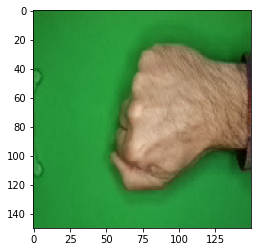

In [24]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  path = fn 
  img = image.load_img(path, target_size =(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0,0]!=0:
    print('paper')
  elif classes[0,1]!=0:
    print('rock')
  else:
    print('scissors')